# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of visualizing and analyzing data to extract insights from it. In other words, EDA is the process of summarizing important characteristics of data in order to gain better understanding of the dataset.

In [1]:
#Load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("data/BA_reviews_cleaned.csv", index_col = 0)

In [3]:
data.head()

,reviews,stars,date,country,verified,reviewstext
0,✅ Trip Verified | British Airways absolutely ...,1,2023-09-01,United Kingdom,True,british airway absolutely care reserved seat c...
1,✅ Trip Verified | My recent experience with B...,1,2023-09-01,United States,True,recent experience british airway horrendous ut...
2,✅ Trip Verified | This is to express our disp...,1,2023-08-31,United States,True,express displeasure concern regarding flight i...
3,✅ Trip Verified | I flew London to Malaga on ...,1,2023-08-30,United Kingdom,True,flew london malaga august club europe stood ar...
4,✅ Trip Verified | I arrived at the airport ab...,1,2023-08-30,Germany,True,arrived airport hour takeoff time get checked ...


### 1. What is the average rating given for Bitish Airways?

In [4]:
data.stars.mean()

4.763215859030837

The average rating given from the customers for Bitish Airways from 1 to 10 is 4.76.

### 2. What is the total count for each rating?

Text(0.5, 1.0, 'Total Review Per Rating')

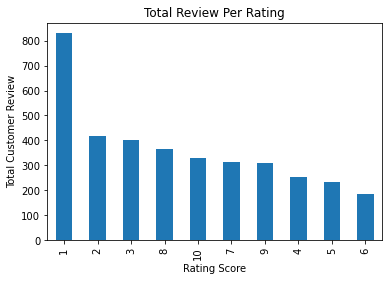

In [5]:
#Visualizing total review per rating
data.stars.value_counts().plot(kind="bar")
plt.xlabel("Rating Score")
plt.ylabel("Total Customer Review")
plt.title("Total Review Per Rating")

#### Total Count of Scores

In [6]:
# Create a DataFrame to store the counts of each unique value in the 'stars' column
data_ratings = pd.DataFrame(data['stars'].value_counts())

# Calculate the percentage values of each count relative to the total count and convert to a list
total_count = data_ratings['stars'].sum()
prctg_values = (data_ratings['stars'] / total_count * 100).tolist()

# Round the percentage values to two decimal places
round_prctg_values = [round(value,2) for value in prctg_values]

# Add the rounded percentage values as a new column 'prctg_values' in the DataFrame
data_ratings['prctg_values'] = round_prctg_values

In [7]:
#Resetting the Index

data_ratings = data_ratings.reset_index()

In [8]:
#Renaming columns

data_ratings.rename(columns={'index':'stars', 'stars':'total_count'}, inplace=True)

In [9]:
data_ratings

,stars,total_count,prctg_values
0,1,831,22.88
1,2,419,11.54
2,3,401,11.04
3,8,364,10.02
4,10,328,9.03
5,7,312,8.59
6,9,309,8.51
7,4,252,6.94
8,5,233,6.42
9,6,183,5.04


Text(0.5, 1.0, 'Total Review Per Rating')

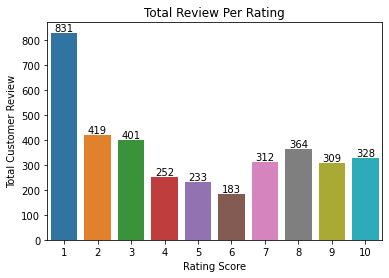

In [10]:
#Visualizing total review per rating
ax = sns.barplot(x=data_ratings.stars, y=data_ratings.total_count, data=data_ratings, errwidth=0)

ax.bar_label(ax.containers[0])

ax.set_xlabel("Rating Score")
ax.set_ylabel("Total Customer Review")
ax.set_title("Total Review Per Rating")

The highest rating score given from customers for British Airways is 1 with 831 total customers. 1 score means that customers less satisfied or having bad experience using British Airways.

### 3. How many countries did British Airways receive reviews?

In [11]:
print(f"{len(data.country.unique())} Countries")

71 Countries


The total number of countries providing reviews for British Airways are 71 countries.

### 4. Which country most review comes from?

In [12]:
data_country_review = pd.DataFrame(data.country.value_counts().head()).reset_index()

In [13]:
#Renaming columns

data_country_review.rename(columns={'index':'country', 'country':'total_review'}, inplace=True)

In [14]:
data_country_review

,country,total_review
0,United Kingdom,2294
1,United States,397
2,Australia,154
3,Canada,114
4,Germany,61


Text(0.5, 1.0, 'Total Review by Country')

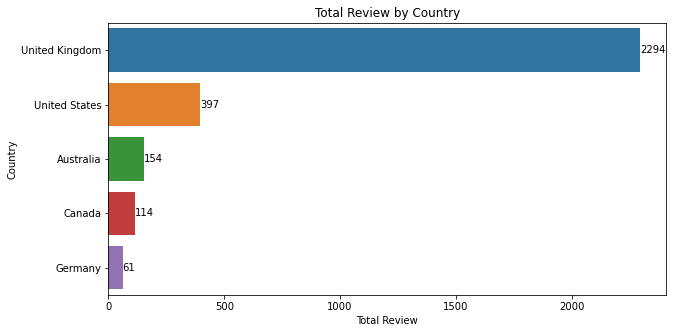

In [15]:
#Visualizing total review by country
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x=data_country_review.total_review, y=data_country_review.country, data=data_country_review, errwidth=0)

ax.bar_label(ax.containers[0])

ax.set_xlabel("Total Review")
ax.set_ylabel("Country")
ax.set_title("Total Review by Country")

The top 5 countries providing reviews for British Airways are UK, US, America, Canada and Germany.

### 5. What is the frequent words mention on the reviews?

In [16]:
#Text processing libraries

import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

(-0.5, 499.5, 499.5, -0.5)

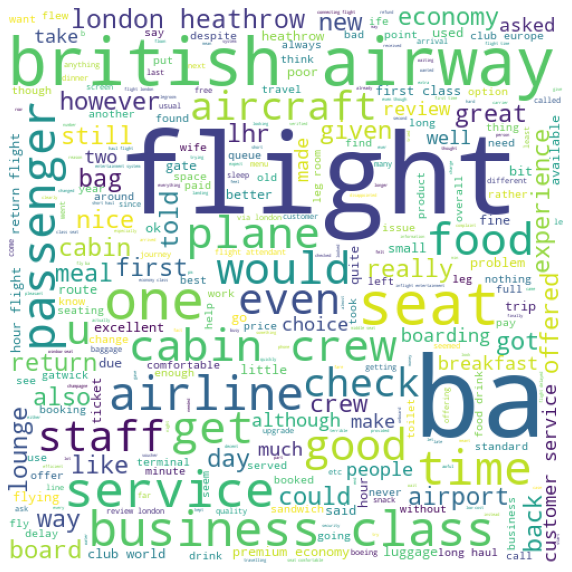

In [17]:
reviews = " ".join(data.reviewstext)
plt.figure(figsize=(10,20))

#Create and generate a word cloud image:
wordcloud = WordCloud(width=500,height=500,max_font_size=100,max_words=300,background_color="white", stopwords=stop_words).generate(reviews)

#Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")

In [18]:
#Text processing libraries
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

(-0.5, 499.5, 499.5, -0.5)

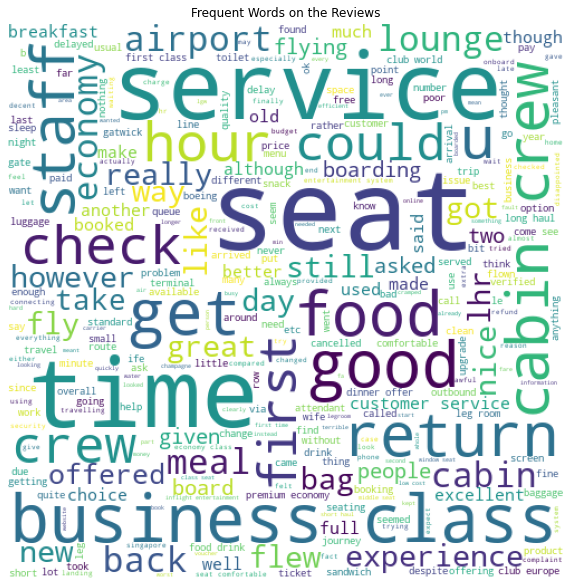

In [19]:
reviews = " ".join(data.reviewstext)
plt.figure(figsize=(10,20))

stop_words.update(["ba","flight","british","airway","airline","plane","passenger","even","also","aircraft","told","would","heathrow","london","one","review"])

#Create and generate a word cloud image:
wordcloud = WordCloud(width=500,height=500,max_font_size=100,max_words=300,background_color="white", stopwords=stop_words).generate(reviews)

# Display the generated image:
plt.title("Frequent Words on the Reviews")
plt.imshow(wordcloud)
plt.axis("off")

We can see that words like "seat", "service" and "time" appear in larger size.The more often the word appears in the text that has been analyzed, it will appear and be displayed in a larger size.

### 6. Showing the top 20 words that appear frequently on the reviews with bar chart

In [20]:
#function to find the frequent words in the data
from nltk import FreqDist
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
#split the text of all reviews into a list of words
words = reviews.split()

#remove certain words that will not be used to determine the sentiment
stop_words = text.ENGLISH_STOP_WORDS.union(["ba","flight","british","airway","airline","plane","passenger","even","also","aircraft","told","would","heathrow","london","one","review","u","lhr"])

all_words = [word for word in words if word not in stop_words]

new_words = FreqDist(all_words).most_common(20)

#create a dataframe of these word and its frequencies
freq_words = pd.Series(dict(new_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'staff'),
  Text(10, 0, 'business'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

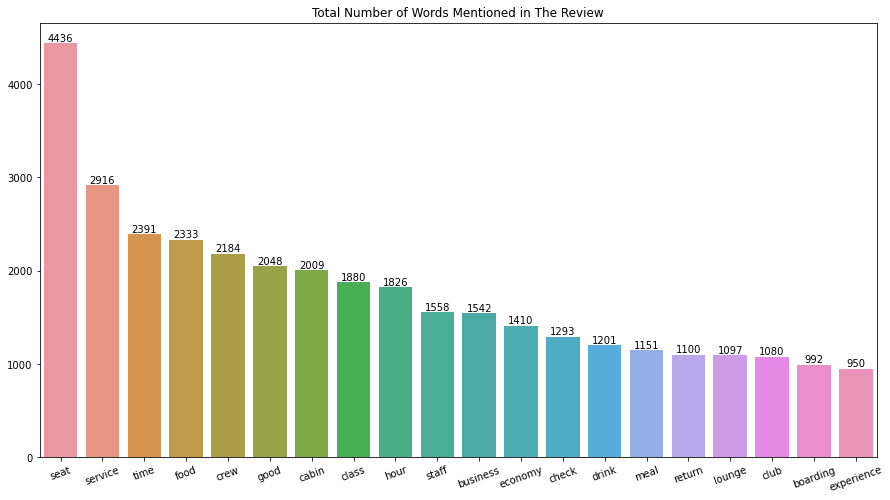

In [22]:
#Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

#Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=freq_words.index, y=freq_words.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.title("Total Number of Words Mentioned in The Review")
plt.xticks(rotation=(20))

From the bar chart we can see the difference between Positive and Negative sentiment. In the bar chart above we can see words like, seat, service, time, food, crew, etc are the words appear frequently on the reviews. The word "seat" appears as the top word that appears more often with 4.436 times. While the second top word "service" appears 2.916 times. This shows a significant difference.

Economy and business are also frequent words mentioned. This indicates most of the customers probably travelled in economy and business class.

### 7. Let's use a pie chart to show the total percentage of each sentiment.

In [23]:
!pip install vaderSentiment

In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [25]:
#function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

data['sentiment'] = data['reviewstext'].apply(vadersentimentanalysis)

#function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'positive'
    elif compound < 0:
        return 'negative'
    else:
        return 'neutral'
    
data['analysis'] = data['sentiment'].apply(vader_analysis)
data.head()

,reviews,stars,date,country,verified,reviewstext,sentiment,analysis
0,✅ Trip Verified | British Airways absolutely ...,1,2023-09-01,United Kingdom,True,british airway absolutely care reserved seat c...,-0.8750,negative
1,✅ Trip Verified | My recent experience with B...,1,2023-09-01,United States,True,recent experience british airway horrendous ut...,-0.9391,negative
2,✅ Trip Verified | This is to express our disp...,1,2023-08-31,United States,True,express displeasure concern regarding flight i...,-0.0880,negative
3,✅ Trip Verified | I flew London to Malaga on ...,1,2023-08-30,United Kingdom,True,flew london malaga august club europe stood ar...,-0.5106,negative
4,✅ Trip Verified | I arrived at the airport ab...,1,2023-08-30,Germany,True,arrived airport hour takeoff time get checked ...,0.4588,neutral


In [26]:
vader_counts = data['analysis'].value_counts()
vader_counts

positive    2087
negative    1168
neutral      377
Name: analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x2741a4a8130>,
 [Text(-0.2554944119521994, 1.0699171021444605, 'positive'),
  Text(-0.10071506510521665, -1.0953796034530003, 'negative'),
  Text(1.042030188656438, -0.3523820170335428, 'neutral')],
 [Text(-0.1393605883375633, 0.5835911466242512, '57.5%'),
  Text(-0.054935490057390894, -0.5974797837016365, '32.2%'),
  Text(0.5683801029035116, -0.19220837292738696, '10.4%')])

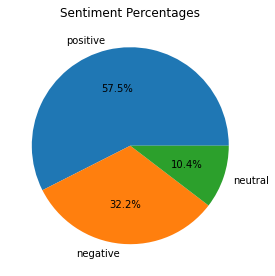

In [27]:
#Visualizing Sentiment feature - Target feature
plt.figure(figsize=(15,7))

#plot pie chart
plt.subplot(1,3,2)
plt.title("Sentiment Percentages")
plt.pie(vader_counts.values, labels = vader_counts.index, autopct='%1.1f%%', shadow=False)



From the data above, we divided the sentiment into 3 sentiments. We have 3 types of sentiment from British Airways reviews dataset namely ‘Positive’, ‘Negative’, and ‘Neutral’. Out of 3632 reviews, 2087 were positive with 57.5% total sentiments, 1168 were negative with 32.2% total sentiments and 377 were neutral with 10.4% total sentiments. This means the majority of reviews was positive.